In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "early_late_small_mol.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [6]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [7]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [8]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [9]:
genes <- genes[2:length(genes)]

In [10]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [11]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [12]:
print(length(genes_intersect))
genes_intersect

[1] 40


[1] "ACTA1_HUMAN"     "MYH6_HUMAN"      "ATXN1_HUMAN"     "ADAMTS12_HUMAN" 
 [5] "CCDC141_HUMAN"   "GRIN2A_HUMAN"    "PRTG_HUMAN"      "RPL23_HUMAN"    
 [9] "PLN_HUMAN"       "VCAN_HUMAN"      "CNTN5_HUMAN"     "BMPER_HUMAN"    
[13] "KCNH7_HUMAN"     "FAM19A4_HUMAN"   "ARHGAP42_HUMAN"  "WWOX_HUMAN"     
[17] "ANKRD1_HUMAN"    "MAML3_HUMAN"     "STK39_HUMAN"     "FRMD4B_HUMAN"   
[21] "SPHKAP_HUMAN"    "MYH7_HUMAN"      "FBXL7_HUMAN"     "PDGFD_HUMAN"    
[25] "RNF150_HUMAN"    "ADAM28_HUMAN"    "NT5C2_HUMAN"     "COL3A1_HUMAN"   
[29] "MEF2C_HUMAN"     "H19_HUMAN"       "HAPLN1_HUMAN"    "LINC00881_HUMAN"
[33] "EPB41L4A_HUMAN"  "SV2C_HUMAN"      "RPS6_HUMAN"      "PRSS35_HUMAN"   
[37] "QRFPR_HUMAN"     "DOK4_HUMAN"      "NPNT_HUMAN"      "LIN28A_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


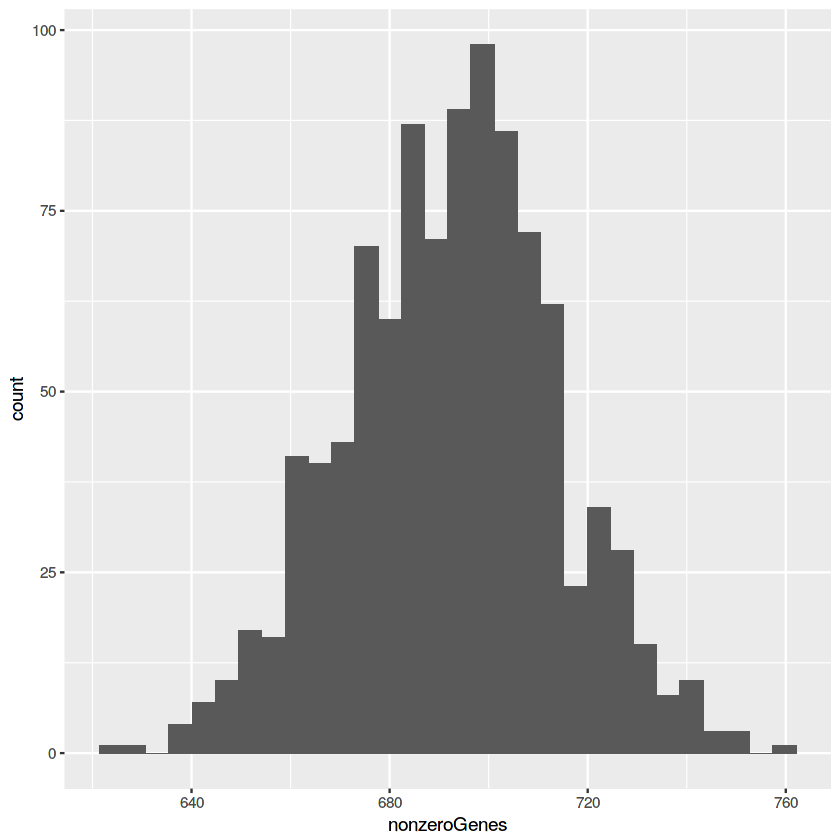

In [13]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [14]:
remove_1st2exp_genes <- c('ACTA1_HUMAN','FBN2_HUMAN','MYH6_HUMAN','COL2A1_HUMAN','ADAMTS12_HUMAN','CCDC141_HUMAN','FAM189A2_HUMAN','GRIN2A_HUMAN','GOLIM4_HUMAN','PRTG_HUMAN','PLN_HUMAN','VCAN_HUMAN','MYO1D_HUMAN','CNTN5_HUMAN','BMPER_HUMAN','KCNH7_HUMAN','FAM19A4_HUMAN','ATP1A1_HUMAN','WWOX_HUMAN','SAMD4A_HUMAN','SPHKAP_HUMAN','MYH7_HUMAN','SEMA5A_HUMAN','FBXL7_HUMAN','PAM_HUMAN','PDGFD_HUMAN','RNF150_HUMAN','ADAM28_HUMAN','MEF2C_HUMAN','H19_HUMAN','RBFOX2_HUMAN','LINC00881_HUMAN','MLIP_HUMAN','GAS6_HUMAN','ADAM23_HUMAN','EPB41L4A_HUMAN','MOXD1_HUMAN','SV2C_HUMAN','PRSS35_HUMAN','QRFPR_HUMAN','DOK4_HUMAN','LIN28A_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "ACTA1_HUMAN"     "MYH6_HUMAN"      "ADAMTS12_HUMAN"  "CCDC141_HUMAN"  
 [5] "GRIN2A_HUMAN"    "PRTG_HUMAN"      "PLN_HUMAN"       "VCAN_HUMAN"     
 [9] "CNTN5_HUMAN"     "BMPER_HUMAN"     "KCNH7_HUMAN"     "FAM19A4_HUMAN"  
[13] "WWOX_HUMAN"      "SPHKAP_HUMAN"    "MYH7_HUMAN"      "FBXL7_HUMAN"    
[17] "PDGFD_HUMAN"     "RNF150_HUMAN"    "ADAM28_HUMAN"    "MEF2C_HUMAN"    
[21] "H19_HUMAN"       "LINC00881_HUMAN" "EPB41L4A_HUMAN"  "SV2C_HUMAN"     
[25] "PRSS35_HUMAN"    "QRFPR_HUMAN"     "DOK4_HUMAN"      "LIN28A_HUMAN"

[1] 28

28 genes are detected in both analyses

### Caclulate fold changes for genes

In [15]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [23]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [24]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [25]:
head(cell_metadata)

X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
AAACATCGAAACATCG_14_6,1577,2986,SeuratProject,D12,Lian,AICS11,08_8_2017,44,KG,7_24_2017,KG_7_24,90,15
AAACATCGAAACATCG_21_10,578,727,SeuratProject,D14,Murry,AICS0,08_11_2017,28,KG,7_27_2017,KG_7_27,78,22
AAACATCGAACAACCA_2_9,489,606,SeuratProject,D12,Lian,AICS37,07_24_2017,34,AN,7_10_2017,AN_7_10,89,3
AAACATCGAACAACCA_5_8,1117,1511,SeuratProject,D14,Murry,AICS0,07_28_2017,32,AN,7_13_2017,AN_7_13,75,6
AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
AAACATCGAACTCACC_26_2,2282,4392,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27


In [26]:
cardioAICS <- t(cardioAICS)

small_mol_cells <- cell_metadata$protocol == "Lian"
cardioAICS <- cardioAICS[small_mol_cells,]

diff_day <- cell_metadata$day[small_mol_cells]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X[small_mol_cells]

cell_metadata <- cell_metadata[small_mol_cells,]

In [27]:
head(cell_metadata)

,X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
1,AAACATCGAAACATCG_14_6,1577,2986,SeuratProject,D12,Lian,AICS11,08_8_2017,44,KG,7_24_2017,KG_7_24,90,15
3,AAACATCGAACAACCA_2_9,489,606,SeuratProject,D12,Lian,AICS37,07_24_2017,34,AN,7_10_2017,AN_7_10,89,3
5,AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
6,AAACATCGAACTCACC_26_2,2282,4392,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27
7,AAACATCGAACTCACC_26_3,2279,3624,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27
8,AAACATCGAAGACGGA_4_9,414,495,SeuratProject,D12,Lian,AICS0,07_28_2017,32,AN,7_13_2017,AN_7_13,52,5


In [28]:
genes.use <- genes_intersect

late_cells <- cell_metadata$X[cell_metadata$day %in% c("D24", "D26")]
early_cells <- cell_metadata$X[cell_metadata$day %in% c("D12", "D14")]

early_exp_mat <- cardioAICS[early_cells,]
late_exp_mat <- cardioAICS[late_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    early_exp <- early_exp_mat[,gene]
    late_exp <- late_exp_mat[,gene]
    log2fc <- log2(mean(expm1(early_exp)) + 1) - log2(mean(expm1(late_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [29]:
lfc_df

log2fc,gene
-2.9033140,CNTN5_HUMAN
-2.6826235,MYH7_HUMAN
-1.7993498,COL3A1_HUMAN
-1.1615466,PLN_HUMAN
-1.1251242,FBXL7_HUMAN
-1.1091843,PDGFD_HUMAN
-1.0154456,PRSS35_HUMAN
-0.9726669,SPHKAP_HUMAN
-0.9130757,H19_HUMAN
-0.8793547,STK39_HUMAN


### Fit using 40 genes

In [30]:
diff_day <- as.factor(diff_day)

In [31]:
head(diff_day)

AAACATCGAAACATCG_14_6  AAACATCGAACAACCA_2_9 AAACATCGAACGCTTA_32_8 
                early                 early                  late 
AAACATCGAACTCACC_26_2 AAACATCGAACTCACC_26_3  AAACATCGAAGACGGA_4_9 
                early                 early                 early 
Levels: early late

In [32]:
library(boot)

In [33]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [34]:
head(subset_cardio)

,ACTA1_HUMAN,MYH6_HUMAN,ATXN1_HUMAN,ADAMTS12_HUMAN,CCDC141_HUMAN,GRIN2A_HUMAN,PRTG_HUMAN,RPL23_HUMAN,PLN_HUMAN,VCAN_HUMAN,⋯,HAPLN1_HUMAN,LINC00881_HUMAN,EPB41L4A_HUMAN,SV2C_HUMAN,RPS6_HUMAN,PRSS35_HUMAN,QRFPR_HUMAN,DOK4_HUMAN,NPNT_HUMAN,LIN28A_HUMAN
AAACATCGAAACATCG_14_6,2.402149,4.652224,2.402149,0.000000,2.402149,1.469937,1.469937,1.469937,0.000000,3.324737,⋯,0,0,1.469937,0,1.469937,2.040951,0,1.469937,0,1.469937
AAACATCGAACAACCA_2_9,0.000000,3.922071,2.862295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.862295,⋯,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0,0.000000
AAACATCGAACGCTTA_32_8,0.000000,0.000000,1.981540,0.000000,2.603269,0.000000,0.000000,0.000000,0.000000,3.651267,⋯,0,0,0.000000,0,1.981540,0.000000,0,0.000000,0,0.000000
AAACATCGAACTCACC_26_2,0.000000,4.497561,1.714471,2.058039,2.829564,2.058039,0.000000,0.000000,1.186888,3.737279,⋯,0,0,0.000000,0,1.714471,0.000000,0,1.186888,0,0.000000
AAACATCGAACTCACC_26_3,0.000000,1.874685,0.000000,2.227662,0.000000,0.000000,3.679620,1.874685,0.000000,0.000000,⋯,0,0,0.000000,0,2.694418,0.000000,0,0.000000,0,1.324255
AAACATCGAAGACGGA_4_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0,0.000000


In [35]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [36]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
    (Intercept)      ACTA1_HUMAN       MYH6_HUMAN      ATXN1_HUMAN  
         2.3177          -1.1533          -0.4366           0.4502  
 ADAMTS12_HUMAN    CCDC141_HUMAN     GRIN2A_HUMAN       PRTG_HUMAN  
        -0.3844          -0.5177          -0.4736          -0.4766  
    RPL23_HUMAN        PLN_HUMAN       VCAN_HUMAN      CNTN5_HUMAN  
        -0.4461           0.7481          -0.5069           0.8163  
    BMPER_HUMAN      KCNH7_HUMAN    FAM19A4_HUMAN   ARHGAP42_HUMAN  
        -0.5351          -0.3644          -0.7023          -0.2952  
     WWOX_HUMAN     ANKRD1_HUMAN      MAML3_HUMAN      STK39_HUMAN  
        -0.3668          -0.2340          -0.2295           0.3055  
   FRMD4B_HUMAN     SPHKAP_HUMAN       MYH7_HUMAN      FBXL7_HUMAN  
        -0.4189           0.4501           0.6429           0.3135  
    PDGFD_HUMAN     RNF150_HUMAN     ADAM28_HUMAN      NT5C2_HUMAN  
  

In [37]:
subset_cardio$diff_day <- diff_day

In [38]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [39]:
cv.test$delta

[1] 0.05049226 0.04990155

In [40]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [41]:
holdout_cardioAICS <- t(holdout_cardioAICS)
holdout_small_mol_cells <- holdout_cell_metadata$protocol == "Lian"
holdout_cardioAICS <- holdout_cardioAICS[holdout_small_mol_cells,]

diff_day <- holdout_cell_metadata$day[holdout_small_mol_cells]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- holdout_cell_metadata$X[holdout_small_mol_cells]

holdout_cell_metadata <- holdout_cell_metadata[holdout_small_mol_cells,]

In [42]:
holdout_cardioAICS

   [[ suppressing 33 column names ‘TTN_HUMAN’, ‘AATF_HUMAN’, ‘NEXN_HUMAN’ ... ]]


801 x 22187 sparse Matrix of class "dgCMatrix"
                                                                       
AAACATCGACACGACC_12_9  5.3094472 .         .         .         6.525198
AAACATCGCAATGGAA_16_6  6.3143385 .         .         .         5.388132
AAACATCGCAGATCTG_8_8   5.7559915 .         .         .         5.707359
AAACATCGCCGACAAC_4_3   5.5698285 .         3.1529403 .         5.347637
AAACATCGCGCTGATC_32_5  6.1502536 .         .         .         5.372613
AAACATCGCGGATTGC_26_11 .         .         .         .         5.590320
AAACATCGCTGGCATA_24_10 5.6505459 2.5126733 3.1644508 2.5126733 6.119230
AAACATCGCTGGCATA_32_4  6.4196208 .         2.1660774 1.2738715 5.875784
AAACATCGGCTAACGA_22_4  .         .         .         .         6.093610
AACAACCAACACGACC_22_7  5.6002852 .         1.8981832 1.3446594 5.351522
AACAACCAACCTCCAA_36_2  .         .         .         .         6.021545
AACAACCAATGCCTAA_44_11 6.3923394 .         3.5573903 .         6.069751
AACAACCAGAGTTAGC_

In [43]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [44]:
holdout_mat

,ACTA1_HUMAN,MYH6_HUMAN,ATXN1_HUMAN,ADAMTS12_HUMAN,CCDC141_HUMAN,GRIN2A_HUMAN,PRTG_HUMAN,RPL23_HUMAN,PLN_HUMAN,VCAN_HUMAN,⋯,HAPLN1_HUMAN,LINC00881_HUMAN,EPB41L4A_HUMAN,SV2C_HUMAN,RPS6_HUMAN,PRSS35_HUMAN,QRFPR_HUMAN,DOK4_HUMAN,NPNT_HUMAN,LIN28A_HUMAN
AAACATCGACACGACC_12_9,0.000000,4.361816,0.0000000,0.0000000,2.8021400,0.000000,0.0000000,0.0000000,0.000000,4.542009,⋯,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCAATGGAA_16_6,0.000000,4.319389,2.3290167,1.7288055,2.3290167,0.000000,2.3290167,0.0000000,1.728806,3.639462,⋯,0.0000000,0.0000000,1.7288055,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCAGATCTG_8_8,0.000000,4.330980,2.1402868,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,3.650902,⋯,0.0000000,0.0000000,0.0000000,0.000000,2.1402868,0.0000000,0.000000,0.000000,0.0000000,2.1402868
AAACATCGCCGACAAC_4_3,0.000000,2.136325,2.1363250,0.0000000,3.1529403,0.000000,0.0000000,2.1363250,0.000000,3.824493,⋯,0.0000000,0.0000000,0.0000000,0.000000,2.1363250,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCGCTGATC_32_5,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,3.020092,0.000000,⋯,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCGGATTGC_26_11,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,2.5337705,0.0000000,0.000000,3.578026,⋯,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCTGGCATA_24_10,0.000000,4.999859,0.0000000,0.0000000,2.5126733,0.000000,2.5126733,2.5126733,0.000000,4.234501,⋯,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,3.164451,0.0000000,0.0000000
AAACATCGCTGGCATA_32_4,0.000000,2.629968,2.4246842,1.2738715,2.1660774,0.000000,1.2738715,0.0000000,2.166077,2.800203,⋯,0.0000000,0.0000000,1.2738715,2.629968,0.0000000,1.8163432,0.000000,1.273872,0.0000000,0.0000000
AAACATCGGCTAACGA_22_4,0.000000,0.000000,1.8245828,0.0000000,0.0000000,0.000000,3.2958754,0.0000000,0.000000,0.000000,⋯,2.8094403,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,1.8245828,0.0000000
AACAACCAACACGACC_22_7,0.000000,4.834874,1.3446594,1.3446594,2.2524110,0.000000,2.5134550,0.0000000,0.000000,3.634408,⋯,0.0000000,0.0000000,0.0000000,0.000000,1.8981832,0.0000000,0.000000,1.898183,0.0000000,0.0000000


In [45]:
dim(holdout_mat)

[1] 801  40

In [46]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [47]:
holdout_predict

AAACATCGACACGACC_12_9  AAACATCGCAATGGAA_16_6   AAACATCGCAGATCTG_8_8 
          2.522905e-03           1.129809e-01           3.156129e-05 
  AAACATCGCCGACAAC_4_3  AAACATCGCGCTGATC_32_5 AAACATCGCGGATTGC_26_11 
          2.900537e-01           9.998956e-01           3.908185e-02 
AAACATCGCTGGCATA_24_10  AAACATCGCTGGCATA_32_4  AAACATCGGCTAACGA_22_4 
          2.087699e-05           9.999895e-01           1.438590e-01 
 AACAACCAACACGACC_22_7  AACAACCAACCTCCAA_36_2 AACAACCAATGCCTAA_44_11 
          1.098620e-04           1.958257e-01           9.992274e-01 
  AACAACCAGAGTTAGC_6_4  AACAACCAGCGAGTAA_46_5  AACAACCATGGTGGTA_38_3 
          8.036274e-06           9.944884e-01           1.000000e+00 
  AACCGAGAAACGCTTA_6_7   AACCGAGAATAGCGAC_0_7  AACCGAGAATCATTCC_0_11 
          9.560159e-02           2.339851e-02           8.637067e-05 
  AACCGAGACAAGACTA_6_2   AACCGAGACCATCCTC_0_2   AACGCTTAAGATCGCA_0_1 
          9.798863e-01           5.537802e-03           3.364471e-04 
  AACGCTTAAGATGTAC_4_2   AACGCTTAATCCTGTA_4_6  AACGCTTACGCTGATC_18_5 
          9.759463e-03           4.714574e-02           9.481869e-01 
 AACGCTTACTCAATGA_22_1   AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1 
          1.185899e-05           2.434744e-03           9.140893e-01 
 AACGCTTAGCTCGGTA_36_7  AACGTGATATCCTGTA_8_10  AACGTGATCACTTCGA_34_2 
          9.139689e-01           1.325022e-02           8.666130e-01 
  AACGTGATCAGATCTG_2_5  AACGTGATCCGAAGTA_16_2  AACGTGATCGACACAC_16_8 
          1.288283e-03           6.662145e-04           1.044639e-02 
AACGTGATCTGAGCCA_34_11  AACGTGATGCCACATA_16_1 AACGTGATGCTAACGA_28_12 
          9.530634e-01           8.612779e-03           9.979183e-01 
 AACGTGATGTCTGTCA_43_3   AACGTGATTGGCTTCA_8_8  AACTCACCACAGCAGA_46_3 
          9.993614e-01           1.492920e-04           9.923159e-01 
  AACTCACCTAGGATGA_6_1  AACTCACCTCCGTCTA_12_4  AAGACGGAAAACATCG_36_8 
          5.705157e-05           4.430382e-01           9.917929e-01 
 AAGACGGAAACAACCA_16_8  AAGACGGAACAAGCTA_26_3 AAGACGGAAGCAGGAA_30_12 
          6.383605e-04           5.320146e-03           9.988126e-01 
 AAGACGGAAGCAGGAA_36_6  AAGACGGACTCAATGA_12_4   AAGACGGAGTCTGTCA_2_5 
          8.080331e-01           1.055262e-02           1.589654e-02 
AAGACGGATCTTCACA_28_10 AAGAGATCCACTTCGA_26_11 AAGAGATCCTGGCATA_18_10 
          9.786049e-01           9.078339e-04           3.181687e-03 
 AAGGACACACACAGAA_44_5  AAGGACACACCTCCAA_26_4   AAGGACACCATACCAA_6_8 
          9.977712e-01           4.562945e-04           1.613505e-06 
 AAGGACACTGGTGGTA_36_7  AAGGTACAACCTCCAA_12_8   AAGGTACAACGCTCGA_2_1 
          9.535459e-01           1.271443e-04           1.900326e-05 
  AAGGTACACCTCTATC_6_7  AAGGTACACGACTGGA_22_6   AAGGTACACTGTAGCC_0_7 
          9.025098e-06           4.200525e-06           8.434880e-04 
 AAGGTACAGCGAGTAA_12_5   AAGGTACAGGAGAACA_4_8   AAGGTACATATCAGCA_2_5 
          3.123755e-02           1.742694e-01           9.596324e-04 
 AAGGTACATCTTCACA_8_10  AATCCGTCAACTCACC_2_11 AATCCGTCACACAGAA_20_12 
          1.221239e-02           7.745803e-03           3.546805e-05 
 AATCCGTCACAGCAGA_44_8  AATCCGTCAGATCGCA_4_11  AATCCGTCAGCCATGC_18_9 
          9.998781e-01           4.587677e-02           1.301565e-04 
 AATCCGTCAGTACAAG_38_1  AATCCGTCATCATTCC_36_2  AATCCGTCATGCCTAA_12_9 
          9.970202e-01           9.135427e-01           1.472806e-04 
 AATCCGTCCACCTTAC_20_5   AATCCGTCGATAGACA_6_8  AATGTTGCAACGCTTA_43_2 
          6.372477e-04           3.546186e-04           9.936510e-01 
  AATGTTGCATTGAGGA_6_6 AATGTTGCCAGATCTG_12_10  AATGTTGCCGACACAC_24_8 
          1.218572e-01           2.683338e-04           2.715683e-04 
 AATGTTGCGACTAGTA_36_9 AATGTTGCGTACGCAA_18_11  AATGTTGCTTCACGCA_8_12 
          9.978375e-01           1.243598e-03           2.954700e-04 
 ACAAGCTAAACCGAGA_32_6 ACAAGCTAAGCCATGC_36_10  ACAAGCTACCTCTATC_28_8 
          9.982886e-01           8.764481e-02           1.946136e-01 
ACAAGCTAGATGAATC_14_10   ACAAGCTATAGGATGA_8_6  ACACAGAAAACGCTTA_14_6 
          6

In [48]:
diff_day

AAACATCGACACGACC_12_9  AAACATCGCAATGGAA_16_6   AAACATCGCAGATCTG_8_8 
               "early"                "early"                "early" 
  AAACATCGCCGACAAC_4_3  AAACATCGCGCTGATC_32_5 AAACATCGCGGATTGC_26_11 
               "early"                 "late"                "early" 
AAACATCGCTGGCATA_24_10  AAACATCGCTGGCATA_32_4  AAACATCGGCTAACGA_22_4 
               "early"                 "late"                "early" 
 AACAACCAACACGACC_22_7  AACAACCAACCTCCAA_36_2 AACAACCAATGCCTAA_44_11 
               "early"                 "late"                 "late" 
  AACAACCAGAGTTAGC_6_4  AACAACCAGCGAGTAA_46_5  AACAACCATGGTGGTA_38_3 
               "early"                 "late"                 "late" 
  AACCGAGAAACGCTTA_6_7   AACCGAGAATAGCGAC_0_7  AACCGAGAATCATTCC_0_11 
               "early"                "early"                "early" 
  AACCGAGACAAGACTA_6_2   AACCGAGACCATCCTC_0_2   AACGCTTAAGATCGCA_0_1 
               "early"                "early"                "early" 
  AACGCTTAAGATGTAC_4_2   AACGCTTAATCCTGTA_4_6  AACGCTTACGCTGATC_18_5 
               "early"                "early"                "early" 
 AACGCTTACTCAATGA_22_1   AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1 
               "early"                "early"                "early" 
 AACGCTTAGCTCGGTA_36_7  AACGTGATATCCTGTA_8_10  AACGTGATCACTTCGA_34_2 
                "late"                "early"                 "late" 
  AACGTGATCAGATCTG_2_5  AACGTGATCCGAAGTA_16_2  AACGTGATCGACACAC_16_8 
               "early"                "early"                "early" 
AACGTGATCTGAGCCA_34_11  AACGTGATGCCACATA_16_1 AACGTGATGCTAACGA_28_12 
                "late"                "early"                 "late" 
 AACGTGATGTCTGTCA_43_3   AACGTGATTGGCTTCA_8_8  AACTCACCACAGCAGA_46_3 
                "late"                "early"                 "late" 
  AACTCACCTAGGATGA_6_1  AACTCACCTCCGTCTA_12_4  AAGACGGAAAACATCG_36_8 
               "early"                "early"                 "late" 
 AAGACGGAAACAACCA_16_8  AAGACGGAACAAGCTA_26_3 AAGACGGAAGCAGGAA_30_12 
               "early"                "early"                 "late" 
 AAGACGGAAGCAGGAA_36_6  AAGACGGACTCAATGA_12_4   AAGACGGAGTCTGTCA_2_5 
                "late"                "early"                "early" 
AAGACGGATCTTCACA_28_10 AAGAGATCCACTTCGA_26_11 AAGAGATCCTGGCATA_18_10 
                "late"                "early"                "early" 
 AAGGACACACACAGAA_44_5  AAGGACACACCTCCAA_26_4   AAGGACACCATACCAA_6_8 
                "late"                "early"                "early" 
 AAGGACACTGGTGGTA_36_7  AAGGTACAACCTCCAA_12_8   AAGGTACAACGCTCGA_2_1 
                "late"                "early"                "early" 
  AAGGTACACCTCTATC_6_7  AAGGTACACGACTGGA_22_6   AAGGTACACTGTAGCC_0_7 
               "early"                "early"                "early" 
 AAGGTACAGCGAGTAA_12_5   AAGGTACAGGAGAACA_4_8   AAGGTACATATCAGCA_2_5 
               "early"                "early"                "early" 
 AAGGTACATCTTCACA_8_10  AATCCGTCAACTCACC_2_11 AATCCGTCACACAGAA_20_12 
               "early"                "early"                "early" 
 AATCCGTCACAGCAGA_44_8  AATCCGTCAGATCGCA_4_11  AATCCGTCAGCCATGC_18_9 
                "late"                "early"                "early" 
 AATCCGTCAGTACAAG_38_1  AATCCGTCATCATTCC_36_2  AATCCGTCATGCCTAA_12_9 
                "late"                 "late"                "early" 
 AATCCGTCCACCTTAC_20_5   AATCCGTCGATAGACA_6_8  AATGTTGCAACGCTTA_43_2 
               "early"                "early"                 "late" 
  AATGTTGCATTGAGGA_6_6 AATGTTGCCAGATCTG_12_10  AATGTTGCCGACACAC_24_8 
               "early"                "early"                "early" 
 AATGTTGCGACTAGTA_36_9 AATGTTGCGTACGCAA_18_11  AATGTTGCTTCACGCA_8_12 
                "late"                "early"                "early" 
 ACAAGCTAAACCGAGA_32_6 ACAAGCTAAGCCATGC_36_10  ACAAGCTACCTCTATC_28_8 
                "late"                 "late"                 "late" 
ACAAGCTAGATGAATC_14_10   ACAAGCTATAGGATGA_8_6  ACACAGAAAACGCTTA_14_6 
           

In [49]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("early")
    } else {
        return("late")
    }
}

In [50]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [51]:
predicted_day

AAACATCGACACGACC_12_9  AAACATCGCAATGGAA_16_6   AAACATCGCAGATCTG_8_8 
               "early"                "early"                "early" 
  AAACATCGCCGACAAC_4_3  AAACATCGCGCTGATC_32_5 AAACATCGCGGATTGC_26_11 
               "early"                 "late"                "early" 
AAACATCGCTGGCATA_24_10  AAACATCGCTGGCATA_32_4  AAACATCGGCTAACGA_22_4 
               "early"                 "late"                "early" 
 AACAACCAACACGACC_22_7  AACAACCAACCTCCAA_36_2 AACAACCAATGCCTAA_44_11 
               "early"                "early"                 "late" 
  AACAACCAGAGTTAGC_6_4  AACAACCAGCGAGTAA_46_5  AACAACCATGGTGGTA_38_3 
               "early"                 "late"                 "late" 
  AACCGAGAAACGCTTA_6_7   AACCGAGAATAGCGAC_0_7  AACCGAGAATCATTCC_0_11 
               "early"                "early"                "early" 
  AACCGAGACAAGACTA_6_2   AACCGAGACCATCCTC_0_2   AACGCTTAAGATCGCA_0_1 
                "late"                "early"                "early" 
  AACGCTTAAGATGTAC_4_2   AACGCTTAATCCTGTA_4_6  AACGCTTACGCTGATC_18_5 
               "early"                "early"                 "late" 
 AACGCTTACTCAATGA_22_1   AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1 
               "early"                "early"                 "late" 
 AACGCTTAGCTCGGTA_36_7  AACGTGATATCCTGTA_8_10  AACGTGATCACTTCGA_34_2 
                "late"                "early"                 "late" 
  AACGTGATCAGATCTG_2_5  AACGTGATCCGAAGTA_16_2  AACGTGATCGACACAC_16_8 
               "early"                "early"                "early" 
AACGTGATCTGAGCCA_34_11  AACGTGATGCCACATA_16_1 AACGTGATGCTAACGA_28_12 
                "late"                "early"                 "late" 
 AACGTGATGTCTGTCA_43_3   AACGTGATTGGCTTCA_8_8  AACTCACCACAGCAGA_46_3 
                "late"                "early"                 "late" 
  AACTCACCTAGGATGA_6_1  AACTCACCTCCGTCTA_12_4  AAGACGGAAAACATCG_36_8 
               "early"                "early"                 "late" 
 AAGACGGAAACAACCA_16_8  AAGACGGAACAAGCTA_26_3 AAGACGGAAGCAGGAA_30_12 
               "early"                "early"                 "late" 
 AAGACGGAAGCAGGAA_36_6  AAGACGGACTCAATGA_12_4   AAGACGGAGTCTGTCA_2_5 
                "late"                "early"                "early" 
AAGACGGATCTTCACA_28_10 AAGAGATCCACTTCGA_26_11 AAGAGATCCTGGCATA_18_10 
                "late"                "early"                "early" 
 AAGGACACACACAGAA_44_5  AAGGACACACCTCCAA_26_4   AAGGACACCATACCAA_6_8 
                "late"                "early"                "early" 
 AAGGACACTGGTGGTA_36_7  AAGGTACAACCTCCAA_12_8   AAGGTACAACGCTCGA_2_1 
                "late"                "early"                "early" 
  AAGGTACACCTCTATC_6_7  AAGGTACACGACTGGA_22_6   AAGGTACACTGTAGCC_0_7 
               "early"                "early"                "early" 
 AAGGTACAGCGAGTAA_12_5   AAGGTACAGGAGAACA_4_8   AAGGTACATATCAGCA_2_5 
               "early"                "early"                "early" 
 AAGGTACATCTTCACA_8_10  AATCCGTCAACTCACC_2_11 AATCCGTCACACAGAA_20_12 
               "early"                "early"                "early" 
 AATCCGTCACAGCAGA_44_8  AATCCGTCAGATCGCA_4_11  AATCCGTCAGCCATGC_18_9 
                "late"                "early"                "early" 
 AATCCGTCAGTACAAG_38_1  AATCCGTCATCATTCC_36_2  AATCCGTCATGCCTAA_12_9 
                "late"                 "late"                "early" 
 AATCCGTCCACCTTAC_20_5   AATCCGTCGATAGACA_6_8  AATGTTGCAACGCTTA_43_2 
               "early"                "early"                 "late" 
  AATGTTGCATTGAGGA_6_6 AATGTTGCCAGATCTG_12_10  AATGTTGCCGACACAC_24_8 
               "early"                "early"                "early" 
 AATGTTGCGACTAGTA_36_9 AATGTTGCGTACGCAA_18_11  AATGTTGCTTCACGCA_8_12 
                "late"                "early"                "early" 
 ACAAGCTAAACCGAGA_32_6 ACAAGCTAAGCCATGC_36_10  ACAAGCTACCTCTATC_28_8 
                "late"                "early"                "early" 
ACAAGCTAGATGAATC_14_10   ACAAGCTATAGGATGA_8_6  ACACAGAAAACGCTTA_14_6 
           

In [52]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted early late
    early   534   30
    late     16  221